<a href="https://colab.research.google.com/github/gauravsekhri/Diabetes-Analysis-and-Prediction/blob/master/PIMA_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
# All patients here are females at least 21 years old of Pima Indian heritage. 
# The datasets consists of several medical predictor variables and one target variable, Outcome. 
# Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [3]:
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# sns.pairplot(data)

In [8]:
corrmat = data.corr()
corrmat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


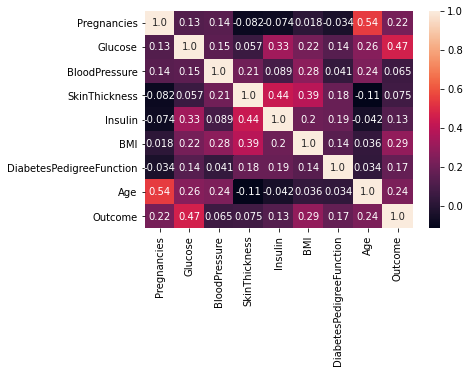

In [9]:
sns.heatmap(corrmat, annot=True, fmt=".2")

In [10]:
diabetes_true_count = len(data.loc[data['Outcome'] == True])
diabetes_false_count = len(data.loc[data['Outcome'] == False])

In [11]:
(diabetes_true_count, diabetes_false_count)

(268, 500)

In [12]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
from sklearn.model_selection import train_test_split

x = data.drop(labels=['Outcome', 'SkinThickness'], axis = 1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [14]:
X_train.shape, X_test.shape

((614, 7), (154, 7))

Check the Misiing values(=0)

In [15]:
print('Counts of Values=0 in Dataset:')
print("Pregnancies: {0}".format(len(data.loc[data['Pregnancies'] == 0])))
print("Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("Age: {0}".format(len(data.loc[data['Age'] == 0])))

Counts of Values=0 in Dataset:
Pregnancies: 111
Glucose: 5
BloodPressure: 35
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0


In [16]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

## Model Selection

### RandomForest Regressor

In [17]:
from sklearn.ensemble import RandomForestClassifier

RFC_model = RandomForestClassifier(random_state=10)
RFC_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [18]:
RFC_pred = RFC_model.predict(X_test)

from sklearn import metrics

# print("Accuracy = ".format(metrics.accuracy_score(y_test, RFC_pred)))

print("Accuracy:",metrics.accuracy_score(y_test, RFC_pred))

Accuracy: 0.7857142857142857


### DecisionTree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

DTC_model = DecisionTreeClassifier(random_state=10)
DTC_model.fit(X_train, y_train.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [20]:
DTC_pred = DTC_model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, DTC_pred))

Accuracy: 0.6883116883116883


### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_predict = model.predict(X_test)

In [23]:
df = pd.DataFrame(data = [y_predict, y_test])
df.T

,0,1
0,0.290596,1.0
1,0.765963,1.0
2,0.153634,0.0
3,0.542199,1.0
4,0.089937,0.0
...,...,...
149,0.701867,1.0
150,0.283514,1.0
151,0.509562,1.0
152,0.142138,0.0


In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)

print('r2_score: ', score)
print('mae: ', mae)

r2_score:  0.31605791314733456
mae:  0.3203663032207297


In [25]:
from math import sqrt

rms_LR = sqrt(mean_squared_error(y_test, y_predict))
mse_LR = mean_squared_error(y_test, y_predict)

print('RMSE: ',rms_LR)
print('MSE: ',mse_LR)

RMSE:  0.38921775574385276
MSE:  0.15149046138628144


### DecisionTree Regressor

In [26]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

In [27]:
rms_DT = sqrt(mean_squared_error(y_test, DT_pred))
mse_DT = mean_squared_error(y_test, DT_pred)

print('RMSE: ',rms_DT)
print('MSE: ',mse_DT)

RMSE:  0.5582905262390825
MSE:  0.3116883116883117


### RandomForest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)

In [29]:
rms_RF = sqrt(mean_squared_error(y_test, RF_pred))
mse_RF = mean_squared_error(y_test, RF_pred)

print('RMSE: ',rms_RF)
print('MSE: ',mse_RF)

RMSE:  0.37735408291961525
MSE:  0.14239610389610388


## Final Scores

In [37]:
print("Linear Regression:")
print('r2_score: ', score)
print('mae: ', mae)

print("\n")

print("Random Forest Classifier:")
print("Accuracy:",metrics.accuracy_score(y_test, RFC_pred))

print("\n")

print("Random Forest Regressor:")
print('RMSE: ',rms_RF)
print('MSE: ',mse_RF)

print("\n")

print("DecisionTree Classifier:")
print("Accuracy:",metrics.accuracy_score(y_test, DTC_pred))

print("\n")

print("DecisionTree Regessor")
print('RMSE: ',rms_DT)
print('MSE: ',mse_DT)

Linear Regression:
r2_score:  0.31605791314733456
mae:  0.3203663032207297


Random Forest Classifier:
Accuracy: 0.7857142857142857


Random Forest Regressor:
RMSE:  0.37735408291961525
MSE:  0.14239610389610388


DecisionTree Classifier:
Accuracy: 0.6883116883116883


DecisionTree Regessor
RMSE:  0.5582905262390825
MSE:  0.3116883116883117


Therefore the RandomForest Classifier has the highest Accuracy.